<a href="https://colab.research.google.com/github/jimmy86417/multimediaN/blob/master/Keras_Mnist_MLP_h1000_DropOut_h1000_DropOut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()

W0615 11:03:36.017649 140002183153536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [4]:
model.add(Dense(units=1000,
  input_dim=784,
  kernel_initializer='normal',
  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000,
  kernel_initializer='normal',
  activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units=10,
  kernel_initializer='normal',
  activation='softmax'))
print(model.summary())

W0615 11:04:02.481742 140002183153536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 11:04:02.484726 140002183153536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0615 11:04:02.503597 140002183153536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0615 11:04:02.513063 140002183153536 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instr

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam', metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,
  y=y_Train_OneHot,validation_split=0.2,
  epochs=10, batch_size=200,verbose=2)

W0615 11:04:12.568755 140002183153536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0615 11:04:12.598740 140002183153536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0615 11:04:12.694412 140002183153536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 16s - loss: 0.3682 - acc: 0.8855 - val_loss: 0.1342 - val_acc: 0.9603
Epoch 2/10
 - 16s - loss: 0.1594 - acc: 0.9513 - val_loss: 0.0987 - val_acc: 0.9704
Epoch 3/10
 - 16s - loss: 0.1181 - acc: 0.9636 - val_loss: 0.0869 - val_acc: 0.9740
Epoch 4/10
 - 16s - loss: 0.0991 - acc: 0.9697 - val_loss: 0.0876 - val_acc: 0.9735
Epoch 5/10
 - 16s - loss: 0.0847 - acc: 0.9728 - val_loss: 0.0797 - val_acc: 0.9776
Epoch 6/10
 - 16s - loss: 0.0749 - acc: 0.9762 - val_loss: 0.0782 - val_acc: 0.9762
Epoch 7/10
 - 16s - loss: 0.0643 - acc: 0.9793 - val_loss: 0.0730 - val_acc: 0.9793
Epoch 8/10
 - 16s - loss: 0.0589 - acc: 0.9812 - val_loss: 0.0783 - val_acc: 0.9783
Epoch 9/10
 - 16s - loss: 0.0559 - acc: 0.9818 - val_loss: 0.0745 - val_acc: 0.9787
Epoch 10/10
 - 16s - loss: 0.0526 - acc: 0.9831 - val_loss: 0.0764 - val_acc: 0.9789


In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

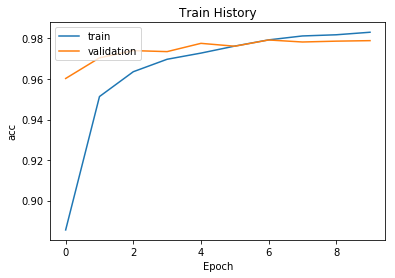

In [7]:
show_train_history(train_history,'acc','val_acc')

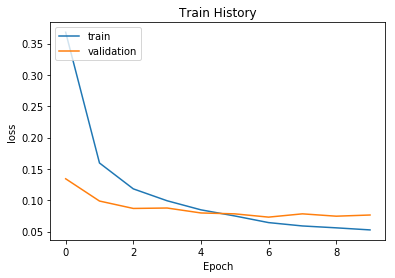

In [8]:
show_train_history(train_history,'loss','val_loss')

In [9]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 145us/step

accuracy= 0.9801


In [10]:
prediction=model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6])

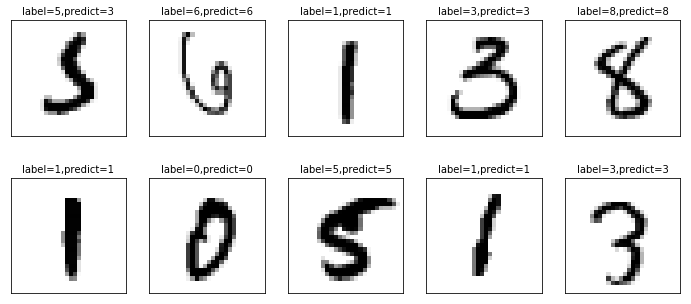

In [11]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
    prediction,idx,num=10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  if num>25: num=25
  for i in range(0, num):
    ax=plt.subplot(5,5, 1+i)
    ax.imshow(images[idx], cmap='binary')
    title= "label=" +str(labels[idx])
    if len(prediction)>0:
      title+=",predict="+str(prediction[idx]) 
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()  
plot_images_labels_prediction(x_test_image,y_test_label,
  prediction,idx=340)

In [12]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
  rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,1,1,0,1,3,1,1,0
1,0,1125,4,1,0,1,1,0,3,0
2,1,0,1023,1,1,0,0,3,3,0
3,0,0,4,998,0,1,0,3,3,1
4,1,2,3,0,968,0,5,1,0,2
5,2,0,0,22,1,852,9,1,3,2
6,3,2,1,1,1,1,948,0,1,0
7,1,5,10,2,0,0,0,1004,2,4
8,2,0,7,10,2,2,1,5,944,1


In [13]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [14]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
674,5,3
1003,5,3
1082,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3100,5,3


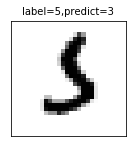

In [15]:
plot_images_labels_prediction(x_test_image,y_test_label
  ,prediction,idx=340,num=1)

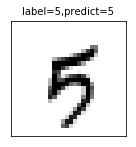

In [16]:
plot_images_labels_prediction(x_test_image,y_test_label
  ,prediction,idx=1289,num=1)